#### 随机森林分类器

**生成随机数**
+ 生成100个两分类数据
+ 数据分布在两个交叠的半圆形区域
+ 划分数据集为训练集和测试集

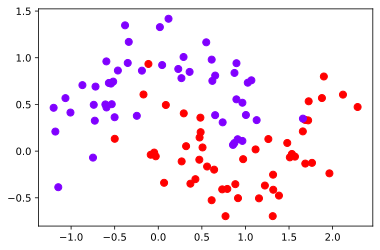

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=42)

plt.scatter(X[:,0],X[:,1], c=y, s=50, cmap='rainbow')

plt.show()

**学习随机森林分类器**

+ 学习包含5棵决策树的随机森林
+ 每棵决策树使用不同的随机种子，随机抽取Bootstrap样本集
+ 每个节点上随机选择1个属性用于划分训练样本集

In [5]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=5, random_state=79)
forest.fit(X_train, y_train)

for tree in forest.estimators_:
    print(tree)

DecisionTreeClassifier(max_features='sqrt', random_state=2869591)
DecisionTreeClassifier(max_features='sqrt', random_state=1715508413)
DecisionTreeClassifier(max_features='sqrt', random_state=2010334282)
DecisionTreeClassifier(max_features='sqrt', random_state=1982403395)
DecisionTreeClassifier(max_features='sqrt', random_state=3360916)


**测试随机森林分类器**

+ 显示每棵随机树的分类边界
+ 显示随机森林的分类边界
+ 显示每棵随机树和随机森林在训练集和测试集上的正确率

In [7]:
from plot_decision_boundary import plot_decision_boundary

eps = 0.05
x_min,x_max = X[:,0].min()-eps, X[:,0].max()+eps
y_min,y_max = X[:,1].min()-eps, X[:,1].max()+eps

fig, axes = plt.subplots(2, 3, figsize=(18, 8))
for ax, tree, i in zip(axes.reshape([6,1]),forest.estimators_,range(5)):
    plot_decision_boundary(tree,axis=[x_min,x_max,y_min,y_max],ax=ax[0])
    ax[0].scatter(X[:,0], X[:,1], c=y.reshape(-1,1), s=50, cmap='rainbow')
    ax[0].set_title("Tree %d" %(i))
    print("Tree %d: train acc = %4.3f, test acc = %4.3f" % (i,tree.score(X_train,y_train),tree.score(X_test,y_test)))

plot_decision_boundary(forest,axis=[x_min,x_max,y_min,y_max],ax=axes[-1,-1])
axes[-1,-1].scatter(X[:,0], X[:,1], c=y.reshape(-1,1), s=50, cmap='rainbow')
axes[-1,-1].set_title( "Forest")
print("Forest: train acc = %4.3f, test acc = %4.3f" % (forest.score(X_train,y_train),forest.score(X_test,y_test)))

plt.show()

Tree 0: train acc = 0.893, test acc = 0.840
Tree 1: train acc = 0.907, test acc = 0.920
Tree 2: train acc = 0.907, test acc = 0.920
Tree 3: train acc = 0.907, test acc = 0.880
Tree 4: train acc = 0.947, test acc = 0.920
Forest: train acc = 0.973, test acc = 0.960
